In [1]:
from hist import Hist
import dask
import awkward as ak
import hist.dask as hda
from coffea import processor
from coffea.nanoevents.methods import candidate
from coffea.dataset_tools import (
    apply_to_fileset,
    max_chunks,
    preprocess,
)
from distributed import Client
import dask_awkward as dak
import numpy as np

/depot/cms/kernels/coffea_latest/lib/python3.11/site-packages/coffea/nanoevents/schemas/fcc.py:5: FutureWarning: In version 2025.1.0 (target date: 2024-12-31 11:59:59-06:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector


In [2]:
common_path = "/depot/cms/users/yun79/hmm/copperheadV1clean/V2_Dec22_HEMVetoOnZptOn_RerecoBtagSF_XS_Rereco_BtagWPsFixed//stage1_output/2018/f1_0/data_A/0/"
data1 = dak.from_parquet(f"{common_path}/part000.parquet")
data2 = dak.from_parquet(f"{common_path}/part001.parquet")

In [3]:
data = ak.to_dataframe(data1)

In [4]:
test =data.compute()

In [9]:
test.loc[:len(test),:]

,mu1_pt,mu2_pt,mu1_eta,mu2_eta,mu1_phi,mu2_phi,mu1_iso,mu2_iso,mu1_pt_over_mass,mu2_pt_over_mass,...,ll_zstar_log_nominal,zeppenfeld_nominal,event,rpt_nominal,wgt_nominal_total,wgt_nominal_ones,nsoftjets2_nominal,htsoft2_nominal,nsoftjets5_nominal,htsoft5_nominal
entry,,,,,,,,,,,,,,,,,,,,,
0,32.211652,31.952664,-0.339966,-2.154297,-2.094727,1.280762,0.017142,0.000000,0.349658,0.346847,...,NaN,NaN,545768681,NaN,1.0,1.0,2,5.979889,0,-0.011353
1,42.177566,41.303130,-0.819463,-0.281555,-1.657583,1.468506,-0.015329,0.011248,0.487538,0.477430,...,NaN,NaN,545792009,NaN,1.0,1.0,2,80.616211,2,80.616211
2,42.102464,36.832384,-1.313232,-2.144531,-2.208984,0.642334,0.000000,0.037041,0.495906,0.433832,...,NaN,NaN,545790005,NaN,1.0,1.0,4,95.277786,3,93.123993
3,72.756394,40.929569,2.044434,2.236816,2.691406,0.370239,0.014217,0.003100,0.722963,0.406708,...,NaN,NaN,545868617,NaN,1.0,1.0,3,12.542892,1,6.562424
4,56.348024,32.973394,2.280273,1.005127,-0.224701,-2.063477,0.000000,0.021440,0.624041,0.365172,...,NaN,NaN,545734151,NaN,1.0,1.0,5,15.984283,0,0.009491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14295,62.596583,32.318936,-2.379395,-0.798462,-0.418701,0.566528,0.000000,0.000000,0.699359,0.361083,...,NaN,NaN,1435226072,NaN,1.0,1.0,0,-0.003159,0,-0.003159
14296,34.599878,32.852628,-0.511597,0.969360,-0.144318,2.944824,0.031173,0.098030,0.398806,0.378667,...,NaN,NaN,1434568860,NaN,1.0,1.0,7,17.562935,0,0.000000
14297,49.865546,41.911587,0.842041,1.202881,2.142578,1.009766,0.000000,0.000000,0.962829,0.809250,...,-1.200555,0.301027,1435131609,0.156246,1.0,1.0,7,27.544724,1,10.595261


In [29]:
np.max(data1.dimuon_mass.compute())

544.9860331372548

array([110.        , 110.81632653, 111.63265306, 112.44897959,
       113.26530612, 114.08163265, 114.89795918, 115.71428571,
       116.53061224, 117.34693878, 118.16326531, 118.97959184,
       119.79591837, 120.6122449 , 121.42857143, 122.24489796,
       123.06122449, 123.87755102, 124.69387755, 125.51020408,
       126.32653061, 127.14285714, 127.95918367, 128.7755102 ,
       129.59183673, 130.40816327, 131.2244898 , 132.04081633,
       132.85714286, 133.67346939, 134.48979592, 135.30612245,
       136.12244898, 136.93877551, 137.75510204, 138.57142857,
       139.3877551 , 140.20408163, 141.02040816, 141.83673469,
       142.65306122, 143.46938776, 144.28571429, 145.10204082,
       145.91836735, 146.73469388, 147.55102041, 148.36734694,
       149.18367347, 150.        ])

In [39]:
regions = ["h-peak", "h-sidebands"]
channels = ["vbf"]
h_mass = (
        hda.Hist.new.StrCat(regions, name="region")
        .StrCat(channels, name="channel")
        .StrCat(["value", "sumw2"], name="val_sumw2")
)
bins = np.linspace(110, 150, num=50)
h_mass = h_mass.Var(bins, name="dimuon_mass")
# h_mass = h_mass.Regular(12, 110, 150, name="dimuon_mass", label="dimuon_mass")

h_mass = h_mass.Double()
to_fill = {
    "region" : "h-peak",
    "channel" : "vbf",
    "val_sumw2" : "value",
    "dimuon_mass" : data1.dimuon_mass
    
}

h_mass.fill(**to_fill)


# to_fill_sumw2 = to_fill.copy()
# to_fill_sumw2["val_sumw2"] = "sumw2"
# to_fill_sumw2["variation"] = variation
# hist.fill(**to_fill_sumw2, weight=weight * weight)

Hist(
  StrCategory(['h-peak', 'h-sidebands'], name='region'),
  StrCategory(['vbf'], name='channel'),
  StrCategory(['value', 'sumw2'], name='val_sumw2'),
  Variable(array([110.        , 110.81632653, 111.63265306, 112.44897959,
       113.26530612, 114.08163265, 114.89795918, 115.71428571,
       116.53061224, 117.34693878, 118.16326531, 118.97959184,
       119.79591837, 120.6122449 , 121.42857143, 122.24489796,
       123.06122449, 123.87755102, 124.69387755, 125.51020408,
       126.32653061, 127.14285714, 127.95918367, 128.7755102 ,
       129.59183673, 130.40816327, 131.2244898 , 132.04081633,
       132.85714286, 133.67346939, 134.48979592, 135.30612245,
       136.12244898, 136.93877551, 137.75510204, 138.57142857,
       139.3877551 , 140.20408163, 141.02040816, 141.83673469,
       142.65306122, 143.46938776, 144.28571429, 145.10204082,
       145.91836735, 146.73469388, 147.55102041, 148.36734694,
       149.18367347, 150.        ]), name='dimuon_mass'),
  storage=Double())

In [46]:
h_mass = h_mass.compute()

/tmp/ipykernel_4081607/1376577057.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title="Dimuon mass")


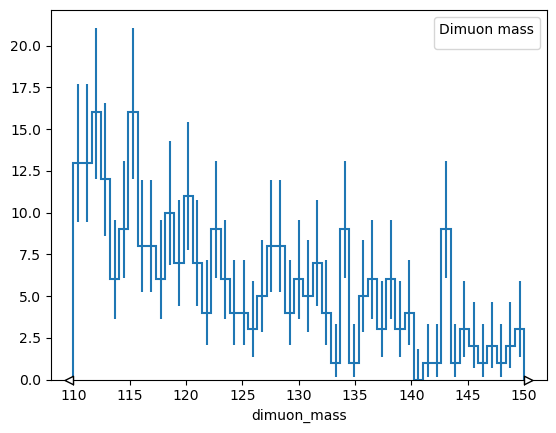

In [49]:
import matplotlib.pyplot as plt

project_dict = {
    "region" : "h-peak",
    "channel" : "vbf",
    "val_sumw2" : "value",
}

fig, ax = plt.subplots()
h_mass[project_dict].project("dimuon_mass").plot1d(ax=ax)
# ax.set_xscale("log")
ax.legend(title="Dimuon mass")

In [48]:
h_mass[project_dict].project("dimuon_mass").values()#.shape
# h_mass.sum()

array([13., 13., 16., 12.,  6.,  9., 16.,  8.,  8.,  6., 10.,  7., 11.,
        7.,  4.,  9.,  6.,  4.,  4.,  3.,  5.,  8.,  8.,  4.,  6.,  5.,
        7.,  4.,  1.,  9.,  1.,  5.,  6.,  3.,  6.,  3.,  4.,  0.,  1.,
        1.,  9.,  1.,  3.,  2.,  1.,  2.,  1.,  2.,  3.])

In [ ]:
[project_dict].project("dimuon_mass")

In [31]:
test_net = Net(3)
test_net.eval()
print(next(test_net.parameters()).is_cuda)
# torch wrapper requires torch jit from the source code
input = torch.rand(100, 3)
torch.jit.trace(test_net, input).save("test_net.pt") # Export to TorchScript
# model_scripted = torch.jit.script(test_net) # Export to TorchScript
# model_scripted.save('test_net.pt') # Save

False


In [2]:
#understand coffea pytorch

import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self, input_shape):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_shape, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.dropout1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.dropout2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(64, 32)
        self.bn3 = nn.BatchNorm1d(32)
        self.dropout3 = nn.Dropout(0.2)
        self.output = nn.Linear(32, 1)

    def forward(self, features):
        x = features
        x = self.fc1(x)
        x = self.bn1(x)
        x = F.tanh(x)
        x = self.dropout1(x)

        x = self.fc2(x)
        x = self.bn2(x)
        x = F.tanh(x)
        x = self.dropout2(x)

        x = self.fc3(x)
        x = self.bn3(x)
        x = F.tanh(x)
        x = self.dropout3(x)

        x = self.output(x)
        output = F.sigmoid(x)
        return output


In [65]:
from coffea.nanoevents import NanoEventsFactory
from coffea.nanoevents.schemas import PFNanoAODSchema
import awkward as ak
import dask_awkward as dak
import numpy as np

def open_events():
    factory = NanoEventsFactory.from_root(
        {"file:./pfnano.root": "Events"},
        schemaclass=PFNanoAODSchema,
    )
    return factory.events()

model = Net(5)
model.eval()
input = torch.rand(100, 5)
torch.jit.trace(model, input).save("test_model.pt")
print(next(model.parameters()).is_cuda)


from coffea.ml_tools.torch_wrapper import torch_wrapper

class DNNWrapper(torch_wrapper):
    def _create_model(self):
        model = torch.jit.load(self.torch_jit)
        model.eval()
        return model
    def prepare_awkward(self, arr):
        # The input is any awkward array with matching dimension
        return [
            ak.values_astype(arr, "float32"), #only modification we do is is force float32
        ], {}


events = open_events()
# print(events.event.compute())
input = ak.concatenate( # Fold 5 event-level variables into a singular array
    [
        events.event[:, np.newaxis],
        events.MET.sumEt[:, np.newaxis],
        events.MET.significance[:, np.newaxis],
        events.event[:, np.newaxis],
        events.event[:, np.newaxis],
    ],
    axis=1,
)
print(input.compute())
dwrap = DNNWrapper("test_model.pt")
dnn_score = dwrap(input)
print(dnn_score) # This is the lazy evaluated dask array! Use this directly for histogram filling
print(dnn_score.compute()) # Eagerly evaluated resut




False
[[1.74e+06, 4.9e+03, 0.295, 1.74e+06, 1.74e+06], ..., [1.74e+06, ..., 1.74e+06]]
dask.awkward<numpy-call-DNNWrapper, npartitions=1>
[[0.495], [0.495], [0.495], [0.495], ..., [0.495], [0.495], [0.495], [0.495]]


In [66]:
common_path = "/depot/cms/users/yun79/hmm/copperheadV1clean/V2_Dec22_HEMVetoOnZptOn_RerecoBtagSF_XS_Rereco_BtagWPsFixed//stage1_output/2018/f1_0/data_A/0/"
data1 = dak.from_parquet(f"{common_path}/part000.parquet")
events = data1

from hist import Hist
import dask
import awkward as ak
import hist.dask as hda
from coffea import processor
from coffea.nanoevents.methods import candidate
from coffea.dataset_tools import (
    apply_to_fileset,
    max_chunks,
    preprocess,
)
from distributed import Client
import dask_awkward as dak
import numpy as np
from coffea.nanoevents import NanoEventsFactory
from coffea.nanoevents.schemas import PFNanoAODSchema
import awkward as ak
import dask_awkward as dak
import numpy as np


n_feat = 3
model = Net(n_feat)
model.eval()
input = torch.rand(100, n_feat)
torch.jit.trace(model, input).save("test_model.pt")


from coffea.ml_tools.torch_wrapper import torch_wrapper

class DNNWrapper(torch_wrapper):
    def _create_model(self):
        model = torch.jit.load(self.torch_jit)
        model.eval()
        return model
    def prepare_awkward(self, arr):
        # The input is any awkward array with matching dimension
        return [
            ak.values_astype(arr, "float32"), #only modification we do is is force float32
        ], {}


# print(events.event.compute())
input = ak.concatenate( # Fold 5 event-level variables into a singular array
    [
        events.dimuon_mass[:, np.newaxis],
        events.dimuon_mass[:, np.newaxis],
        events.dimuon_mass[:, np.newaxis],
    ],
    axis=1,
)
print(input.compute())
dwrap = DNNWrapper("test_model.pt")
output = dwrap(input)
print(dnn_score) # This is the lazy evaluated dask array! Use this directly for histogram filling
print(dnn_score.compute()) # Eagerly evaluated result


regions = ["h-peak", "h-sidebands"]
channels = ["vbf"]
score_hist = (
        hda.Hist.new.StrCat(regions, name="region")
        .StrCat(channels, name="channel")
        .StrCat(["value", "sumw2"], name="val_sumw2")
)
bins = np.linspace(110, 150, num=50)
score_hist = score_hist.Var(bins, name="dnn_score")

score_hist = score_hist.Double()
to_fill = {
    "region" : "h-peak",
    "channel" : "vbf",
    "val_sumw2" : "value",
    "dnn_score" : dnn_score
    
}

score_hist.fill(**to_fill)


import matplotlib.pyplot as plt

project_dict = {
    "region" : "h-peak",
    "channel" : "vbf",
    "val_sumw2" : "value",
}

fig, ax = plt.subplots()
score_hist[project_dict].project("dnn_score").plot1d(ax=ax)
# ax.set_xscale("log")
ax.legend(title="DNN score")

[[92.1, 92.1, 92.1], [86.5, 86.5, 86.5], ..., [89.5, ...], [75.3, 75.3, 75.3]]


ValueError: buffer is smaller than requested size

In [14]:
events.MET.fields
# events.MET.sumEt.compute()

['MetUnclustEnUpDeltaX',
 'MetUnclustEnUpDeltaY',
 'covXX',
 'covXY',
 'covYY',
 'phi',
 'pt',
 'significance',
 'sumEt',
 'sumPtUnclustered',
 'fiducialGenPhi',
 'fiducialGenPt']

In [17]:
test_input = torch.from_numpy(ak.to_numpy(input.compute())).float()
# print(test_input)
print(model(test_input))

tensor([[0.5456],
        [0.5456],
        [0.5456],
        [0.5456],
        [0.5456],
        [0.5456],
        [0.5456],
        [0.5456],
        [0.5456],
        [0.5456]], grad_fn=<SigmoidBackward0>)


In [91]:
len({})

0

In [75]:
data1

dask.awkward<from-parquet, npartitions=1>

In [111]:


class ParticleNetExample(torch_wrapper):
    def prepare_awkward(self, events):
        jets = ak.flatten(events.Jet)

        def pad(arr):
            return ak.fill_none(
                ak.pad_none(arr, 100, axis=1, clip=True),
                0.0,
            )

        # Human readable version of what the inputs are
        # Each array is a N jets x 100 constituent array
        imap = {
            "points": {
                "deta": pad(jets.eta - jets.constituents.pf.eta),
                "dphi": pad(jets.delta_phi(jets.constituents.pf)),
            },
            "features": {
                "dr": pad(jets.delta_r(jets.constituents.pf)),
                "lpt": pad(np.log(jets.constituents.pf.pt)),
                "lptf": pad(np.log(jets.constituents.pf.pt / jets.pt)),
                "f1": pad(np.log(np.abs(jets.constituents.pf.d0) + 1)),
                "f2": pad(np.log(np.abs(jets.constituents.pf.dz) + 1)),
            },
            "mask": {
                "mask": pad(ak.ones_like(jets.constituents.pf.pt)),
            },
        }
        print(f"dr: {pad(jets.delta_r(jets.constituents.pf)).compute()}")

        # Compacting the array elements into the desired dimension using
        # ak.concatenate
        retmap = {
            k: ak.concatenate([x[:, np.newaxis, :] for x in imap[k].values()], axis=1)
            for k in imap.keys()
        }
        print(f"retmap: {type(retmap['features'].compute())}")
        print(f"retmap: {(retmap['features'].compute())}")

        # Returning everything using a dictionary. Also take care of type
        # conversion here.
        return (), {
            "points": ak.values_astype(retmap["points"], "float32"),
            "features": ak.values_astype(retmap["features"], "float32"),
            "mask": ak.values_astype(retmap["mask"], "float16"),
        }

    def postprocess_awkward(self, return_array, events):
        
        softmax = np.exp(return_array)[:, 0] / ak.sum(np.exp(return_array), axis=-1)
        print(f"softmax: {softmax.compute()}")
        njets = ak.count(events.Jet.pt, axis=-1)
        return ak.unflatten(softmax, njets)


pn_example = ParticleNetExample("model.pt")

# Running on dask awkward arrays
dask_events = open_events()
dask_jets = dask_events.Jet
dask_jets["MLresults"] = pn_example(dask_events)
dask_events["Jet"] = dask_jets
print(dask_events.Jet.MLresults.compute())

print(dask_awkward.necessary_columns(dask_events.Jet.MLresults))

dr: [[0.175, 0.0841, 0.324, 0.0711, 0.286, 0.167, ..., 0, 0, 0, 0, 0, 0], ...]
retmap: <class 'awkward.highlevel.Array'>
retmap: [[[0.175, 0.0841, 0.324, 0.0711, 0.286, 0.167, ..., 0, 0, 0, 0, 0], ...], ...]


RuntimeError: forward() is missing value for argument 'features'. Declaration: forward(__torch__.ParticleNet.ParticleNetTagger self, Tensor points, Tensor features, Tensor mask) -> Tensor

In [100]:
model = torch.jit.load("model.pt")
# print(model
model(torch.ones(2))

RuntimeError: forward() is missing value for argument 'features'. Declaration: forward(__torch__.ParticleNet.ParticleNetTagger self, Tensor points, Tensor features, Tensor mask) -> Tensor

In [35]:
import dask_awkward as dak
import glob
base_path = f"/depot/cms/users/yun79/hmm/copperheadV1clean/V2_Dec22_HEMVetoOnZptOn_RerecoBtagSF_XS_Rereco/stage1_output/2018/f1_0/"

# bkg_processes = ["dy_M-100To200", "ewk_lljj_mll105_160_ptj0","ttjets_dl","ttjets_sl"]
bkg_processes = ["dy_M-100To200", "ttjets_dl","ttjets_sl"]
process = "ttjets_dl"
filenames = []
for process in bkg_processes:
    filenames += glob.glob(f"{base_path}/{process}/*/*.parquet")
filenames

['/depot/cms/users/yun79/hmm/copperheadV1clean/V2_Dec22_HEMVetoOnZptOn_RerecoBtagSF_XS_Rereco/stage1_output/2018/f1_0//dy_M-100To200/0/part336.parquet',
 '/depot/cms/users/yun79/hmm/copperheadV1clean/V2_Dec22_HEMVetoOnZptOn_RerecoBtagSF_XS_Rereco/stage1_output/2018/f1_0//dy_M-100To200/0/part084.parquet',
 '/depot/cms/users/yun79/hmm/copperheadV1clean/V2_Dec22_HEMVetoOnZptOn_RerecoBtagSF_XS_Rereco/stage1_output/2018/f1_0//dy_M-100To200/0/part646.parquet',
 '/depot/cms/users/yun79/hmm/copperheadV1clean/V2_Dec22_HEMVetoOnZptOn_RerecoBtagSF_XS_Rereco/stage1_output/2018/f1_0//dy_M-100To200/0/part506.parquet',
 '/depot/cms/users/yun79/hmm/copperheadV1clean/V2_Dec22_HEMVetoOnZptOn_RerecoBtagSF_XS_Rereco/stage1_output/2018/f1_0//dy_M-100To200/0/part159.parquet',
 '/depot/cms/users/yun79/hmm/copperheadV1clean/V2_Dec22_HEMVetoOnZptOn_RerecoBtagSF_XS_Rereco/stage1_output/2018/f1_0//dy_M-100To200/0/part542.parquet',
 '/depot/cms/users/yun79/hmm/copperheadV1clean/V2_Dec22_HEMVetoOnZptOn_RerecoBtagS

In [43]:
! ls /depot/cms/users/yun79/hmm/copperheadV1clean/V2_Dec22_HEMVetoOnZptOn_RerecoBtagSF_XS_Rereco/stage1_output/2018/f1_0/

data_A	       ewk_lljj_mll105_160_ptj0       ttjets_dl		 wz_2l2q
data_B	       ewk_lljj_mll105_160_py_dipole  ttjets_sl		 wz_3lnu
data_C	       ggh_powhegPS		      vbf_powheg_dipole  zz
data_D	       st_tw_antitop		      ww_2l2nu
dy_M-100To200  st_tw_top		      wz_1l1nu2q


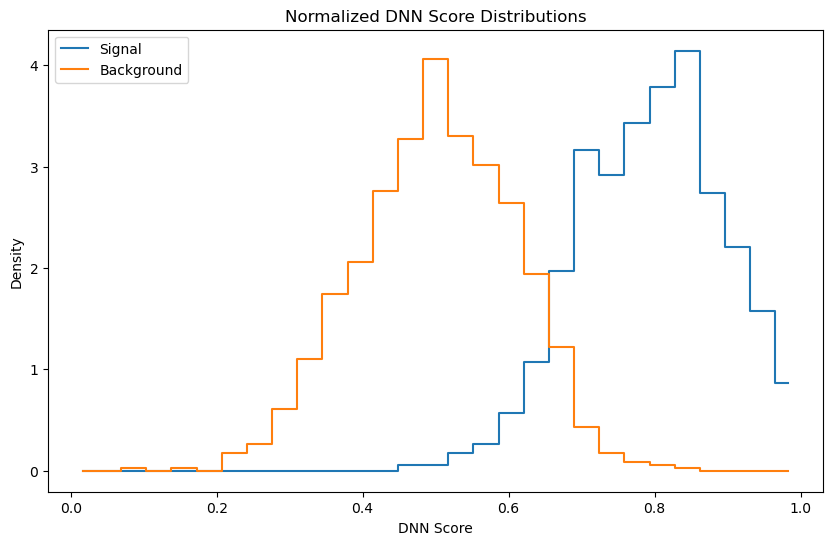

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Example data: replace these with your actual DNN scores for background and signal
dnn_scores_signal = np.random.normal(0.8, 0.1, 1000)  # Simulated DNN scores for signal
dnn_scores_background = np.random.normal(0.5, 0.1, 1000)  # Simulated DNN scores for background

# Create histograms and normalize them
bins = np.linspace(0, 1, 30)  # Adjust bin edges as needed

# Histogram for signal, normalized to one
hist_signal, bins_signal = np.histogram(dnn_scores_signal, bins=bins, density=True)
bin_centers_signal = 0.5 * (bins_signal[:-1] + bins_signal[1:])

# Histogram for background, normalized to one
hist_background, bins_background = np.histogram(dnn_scores_background, bins=bins, density=True)
bin_centers_background = 0.5 * (bins_background[:-1] + bins_background[1:])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(bin_centers_signal, hist_signal, label='Signal', drawstyle='steps-mid')
plt.plot(bin_centers_background, hist_background, label='Background', drawstyle='steps-mid')
plt.xlabel('DNN Score')
plt.ylabel('Density')
plt.title('Normalized DNN Score Distributions')
plt.legend()
plt.show()


In [37]:
events.wgt_nominal.compute()

AssertionError: unexpected combination: <class 'awkward.forms.bitmaskedform.BitMaskedForm'> and <class 'awkward.contents.numpyarray.NumpyArray'>

In [41]:
events1 = dak.from_parquet(glob.glob(f"{base_path}/ttjets_sl/*/*.parquet"))
events2 = dak.from_parquet(glob.glob(f"{base_path}/dy_M-100To200/*/*.parquet"))

In [ ]:
events1 + events2

In [58]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch import tensor

# class HingeLoss(nn.Module):
#     def __init__(self):
#         super(HingeLoss, self).__init__()
    
#     def forward(self, outputs, targets):
#         # Ensure targets are -1 or 1
#         targets = targets.float()
#         loss = torch.mean(torch.clamp(1 - outputs * targets, min=0))
#         return loss

# Define Hinge Loss for binary classification with targets 0 or 1
class HingeLoss(nn.Module):
    def __init__(self):
        super(HingeLoss, self).__init__()
    
    def forward(self, outputs, targets):
        # Map targets {0, 1} -> {-1, 1}
        targets = 2 * targets - 1  # Convert 0 -> -1, 1 -> 1
        # Calculate hinge loss
        print(targets)
        loss = torch.mean(torch.clamp(1 - outputs * targets, min=0))
        return loss

criterion = HingeLoss() 

target = tensor([0, 1, 1])
preds = tensor([0.5, 0.7, 0.1])

criterion(preds, target)

tensor([-1,  1,  1])


tensor(0.9000)

In [59]:
preds = torch.tensor([0.25, 0.25, 0.55, 0.75, 0.75])
target = torch.tensor([0, 0, 1, 1, 1])
criterion(preds, target)

tensor([-1, -1,  1,  1,  1])


tensor(0.6900)